# Analysis of dataset
The objective of this dataset is to try to **define probability for a patient to have a disease** on their tooth supporting tissues from simple data that can be acquired remotely. It is to define the risk factors to develop such diseases.

## Objectives: 
### Perform a detailed analysis on the dataset
### Use 2 from the list and one from outside the list
• K Nearest Neighbors
• Decision Trees
• Generalized Linear Models
• Support Vector Machines
• Multilayer perceptrons
### Optimize the solutions for better predictibility of a model

Basic analysis of the dataset:
0. ID 
2. Sex - Boolean (Woman 0, Man 1)
3. Age - Integer
4. BMI - Float
4. Smoking - Integer (Non smoker 0, Previous smoker 1, Smoker 2)
5. Pathologies - Integer (Yes, No, N/A) 
6. Pregnant - Integer (Yes, No, N/A)
7. Food_Sugar - Integer (Never, Sometimes, Several times a day, Once a day, Several times a day)
8. Fat_Salty - Integer (Never, Sometimes, Several times a day, Once a day, Several times a day)
9. Soda - Integer (Never, Sometimes, Several times a day, Once a day, Several times a day)
10. Alcohol - Integer (Never, Sometimes, Several times a day, Once a day, Several times a day) 
11. Frequence_Appoint_Dentist - Integer (Never, Once a year, 2-3 a year, Regularly) 
12. Hygeine - Integer (0,1,2,3,4,5,6)
13. Gingivorrhagia - Integer (Absent, Corrélées (cycle, etc…), Provoked,Spontanées) 1 missing value
14. Stress_Daily - Integer (1-10) 4 missing values
15. PI - (0-3) 1 value missing
*Label*
16. Diagnosis - Integer  (Healthy, Periodontitis, Gingivitis) 49 values missing

---

First meet with The Guy


* Deleting Y's sounded like an idea. We can use some of the data to train a model to see if it works well. Can have a strategy to implement this data
* For N/As in Pathologies - failed to extract that value from the patient
* We have a very accurate dataset, so making medians or means cannot be a good solution for missing vaues. Replacing missing values with outliers can be a good solution too. Consider this point when you're doing your analysis.

### Mistakes spotted in the data set:
* BMI has an outlier - 937.5

## General functions to be used

In [0]:
#Imports

#Nimish
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#from sklearn.preprocessing import imputer as ip


#Ilya
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split, KFold, cross_val_score

#Reynaldo
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import preprocessing
from collections import Counter

#Whoever makes imports, write names xD


Code for converting dataset to numbers for readability. In order:

*   convertSimple: converts the CSV file that is passed to a dataframe
*   convertWithCategories: converts the dataframe so that all columns specified have their values converted to categories. Each category represents a number.
*   convertDeleteNulls: converts the dataframe so that every row that has at least one column with a null value is deleted from the dataframe.
*   deleteRowsWithOutlyingValues: deletes all aoutlying values 
*   getAllColumnsButID: returns an array of all the columns of a dataframe, except the ID.
*   transformPCA: transforms a dataframe into a reduced dimentionality version, based on the number of components passed.



In [0]:
def convertSimple(filename):
    data = pd.read_csv("{}.csv".format(filename))
    return data

In [0]:
def convertWithCategories(data, columnNames):
    data_copy = data.copy()
    for column in columnNames:
      data_copy[column] = data_copy[column].astype('category')
      data_copy[column] = data_copy[column].cat.codes
    
    return data_copy


In [0]:
def convertDeleteNulls(data, columnNames):
    data_copy = data.copy()
    # Delete null values
    data_copy = data_copy.dropna(axis=0, subset=columnNames)
    
    return data_copy

In [0]:
def convertDeleteColumn(data, columnName):
    data_copy = data.copy()
    del data_copy[columnName]

    return data_copy


In [0]:
def deleteRowsWithOutlyingValues(dataframe, columns):
    data_copy = dataframe.copy()
    # For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
    # Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
    # Finally, result of this condition is used to index the dataframe.
    return data_copy[(np.abs(stats.zscore(dataframe[columns])) < 3.5)]

In [0]:
def getAllColumnsButID(dataFrame):
    columns = []
    for col in dataFrame.columns:
        if col != 'ID':
            columns.append(col)
    return columns

In [0]:
def transformPCA(dataframe, numberOfComponents):
    pca = PCA(n_components=numberOfComponents)
    pca.fit(dataframe)
    return pca.transform(dataframe)

Code for data visualization. In order:


*   plotColumns: plots all the columns in the dataframe in a scatter plot with the x axis being the ID of the row.
*   printNullColumns: prints all the columns that have at least one null value in any of the rows of the dataset.
*   plotCorrelationHeatmap: plots a correlation heatmap etween the columns of a data frame, based on the columns that want to be analyzed.



In [0]:
def plotColumns(dataFrame):
    for column in dataFrame.columns:
      if column == "ID":
        continue
      number = len(Counter(dataFrame[column]).keys())
      print(number)
      plt.hist(dataFrame[column], bins=number, color='steelblue', edgecolor='black', linewidth=1.0)
      plt.xlabel(column)
      plt.ylabel("Number of occurrences")
      plt.show()


In [0]:
def printNullColumns(dataframe):
    columns = dataframe.columns

    columnsNull = []

    for col in columns:
        for index, row in dataframe.iterrows():
            if pd.isna(row[col]):
                columnsNull.append(col)
                break
    print("Columns with null values: ", columnsNull)

In [0]:
def plotCorrelationHeatmap(dataframe, columnsToPlot):
    correlation = dataframe[columnsToPlot].corr()
    #set size of the plot
    plt.figure(figsize = (16,5))
    # plot the heatmap and annotation on it
    heatmap = sns.heatmap(correlation, xticklabels=correlation.columns,
                          yticklabels=correlation.columns, annot=True)
    return heatmap


## Reynaldo's Code

### Data visualization

First, we parse the data and we delete the rows with null values on the diagnosis column, as this is the label. 

Afterwards, we parse the data to convert every specified row to a category, so that the string values are converted to numbers.

In [0]:
#Reynaldo's Code on data visualization
    
    data = convertSimple('/content/data')

    dataFiltered = convertDeleteNulls(data, ['Diagnosis'])

    dataFilteredCat = convertWithCategories(dataFiltered, ['Sex', 'Smoking', 'Pathologies', 'Pregnant',
                                                           'Food_Sugar', 'Fat_Salty', 'Soda', 'Alcohol', 'Frequence_Appoint_Dentist',
                                                           'Hygiene_Dental', 'Stress_Daily', 'Gingivorrhagia', 'PI', 'Diagnosis'])

When the basic data conversion happens, we visualize the data creating a scatter plot of each column, with respect to the ID.

2


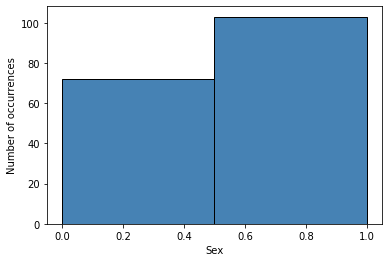

56


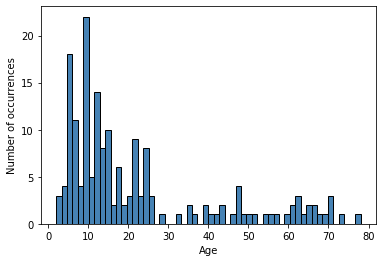

106


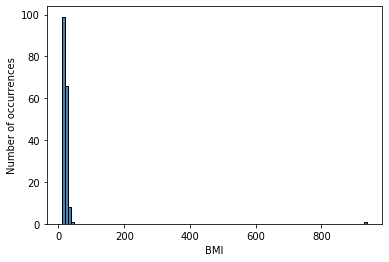

3


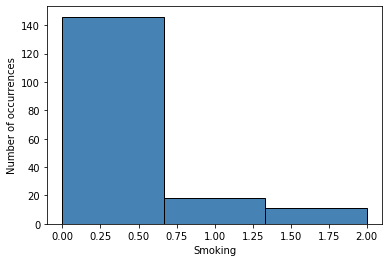

3


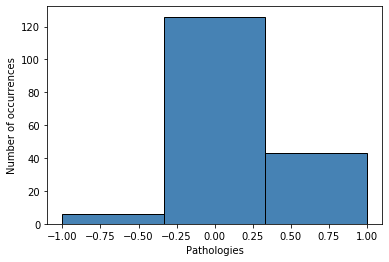

3


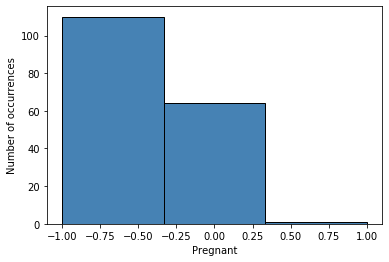

5


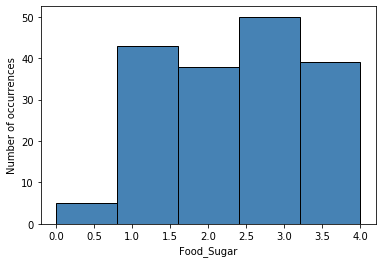

5


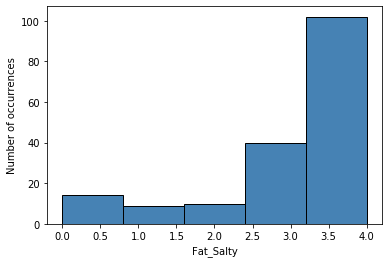

5


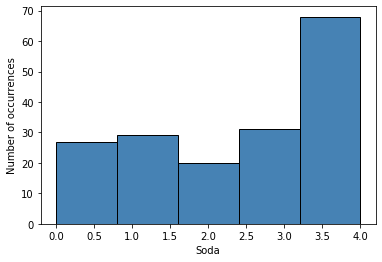

5


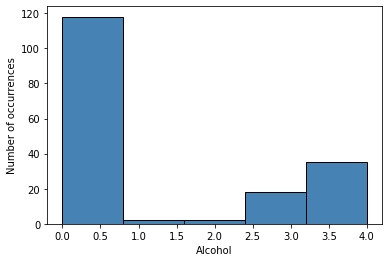

5


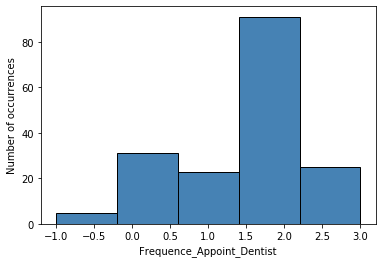

7


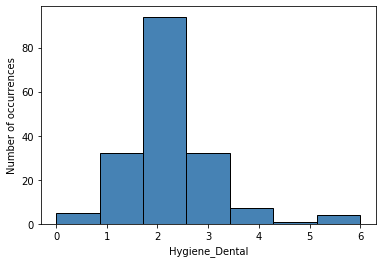

4


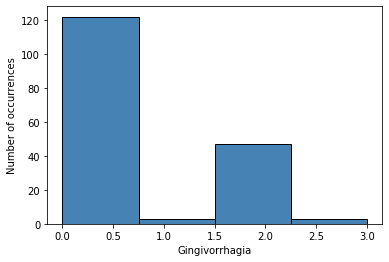

11


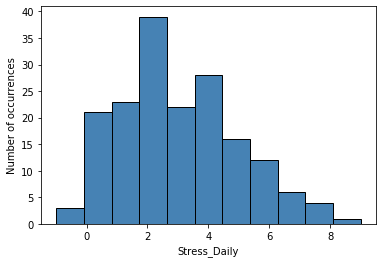

4


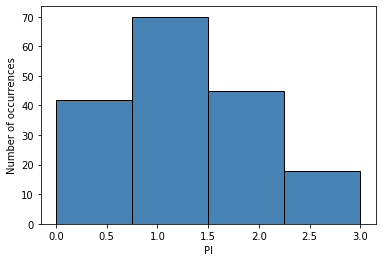

3


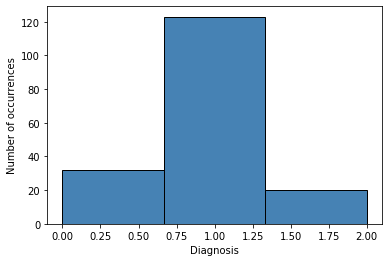

In [0]:
  plotColumns(dataFilteredCat)

It's visible that the categorization went smoothily, as all the plots consists on clear lines on integer values. However, it can be seen in the BMI column that there is an error, with a value being way outside of the range. This can be explained by human error on inputing the value. To deal with that value, we decided to just remove it from the dataframe, as there is no clear way to replace that value for another one.

This removal was performed using a function that removes all outlying values from the dataframe in the columns specified. The functions searches for the Z-value of each row with regards f the column being analyzed and deletes every row that returns an absolute value of more than 3.5 in said Z-value, as it is recommended [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm).

Note: Z-value represents, for a specific value, how many standard deviations it is from the mean.

105


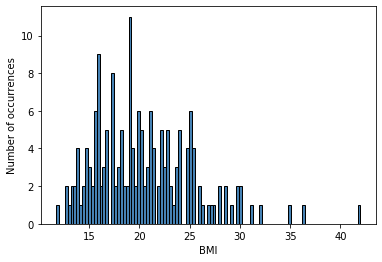

In [0]:

dataFilteredCatNoOutlier = deleteRowsWithOutlyingValues(dataFilteredCat, ['BMI'])
plotColumns(dataFilteredCatNoOutlier[['ID','BMI']])

Now that we have eliminated the outlying value, we perform a correlation analysis between the variables. This will allow us to see what are the features that influence more the final diagnosis and will also allow us to see if there are variables that are very alike, so that they can be later merged or eliminated.

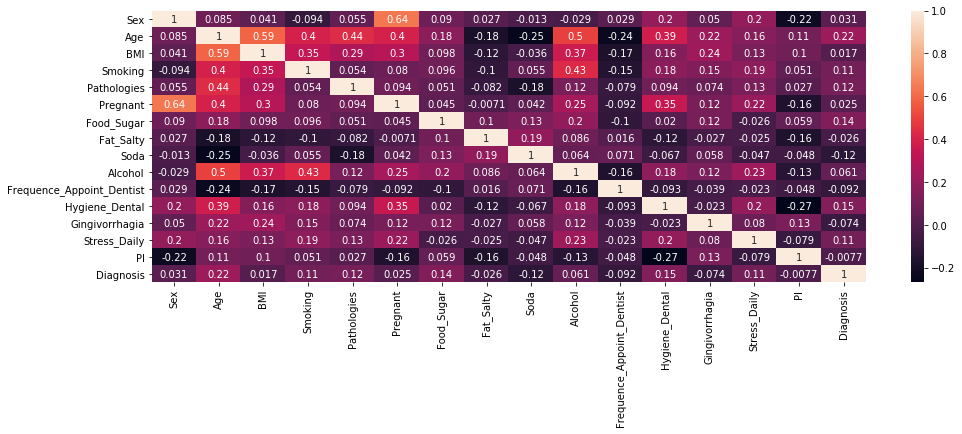

In [0]:
    plotCorrelationHeatmap(
        dataFilteredCatNoOutlier, getAllColumnsButID(dataFilteredCatNoOutlier))

It can be seen that, for the diagnosis label, there are some variables that have a correlation close to 0, which means they do not influence the outcome. These are:

1.   PI with a score of -0.0077
2.   BMI with a score of 0.017
3.   Pregnancy with a score of 0.025
4.   Fat_Salty with a score of -0.026
5.   Sex with a score of 0.031

There are others, but we decided to consider these 5 due to them having an absolute value that can be rounded to a value lower than 0.1.



Another thing that can be pointed out is that there are highly correlated variables:

1.   Sex and pregnancy are highly correlated.
2.   Age and: BMI, pathologies, smoking, pregnancy and alcohol
3.   Alcohol and smoking

There are other somehow correlated values, but we decided to focus on these due to them having an arbitrary absolute value of 0.4 or more.

This information can be useful in performing a PCA analysis.



It also needs to be considered that these correlation, which uses the pearson method, only measures linear correlation. This means that this score is not a guarantee that the variables are not correlated, however it gives a good indication on what can be filtered out so that the data is of better quality to train the models.

Now, we can perform a PCA conversion based on the information we have. First, we can create a PCA based on all information and afterwards a PCA based on the reduced feature dataframe.

For both, we first need to separate the features from the label, perform the PCA on the features and then reunite the new components with the corresponding label to reperform the correlation analysis.

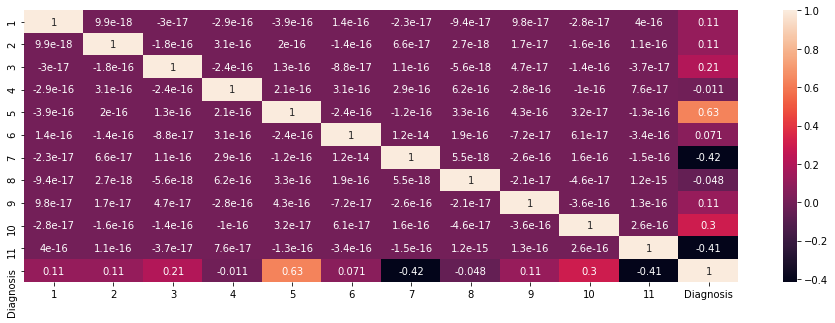

In [0]:
  ids = pd.DataFrame(dataFilteredCatNoOutlier['ID'])
  y_label = pd.DataFrame(dataFilteredCatNoOutlier['Diagnosis'])

  x_label = dataFilteredCatNoOutlier.drop(['ID', 'Diagnosis'], axis=1)

  #We normalize the data, so that PCA gets better results
  x_label = dataFilteredCatNoOutlier.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_label_scaled = min_max_scaler.fit_transform(x_label)
  x_label_scaled = pd.DataFrame(x_label_scaled)

  x_label_scaled = pd.DataFrame(transformPCA(x_label_scaled, 11))

  resulting_pca_all = pd.DataFrame(np.hstack([ids, x_label_scaled, y_label]))

  resulting_pca_all = resulting_pca_all.rename(columns={0:'ID', 12:'Diagnosis'})

  plotCorrelationHeatmap(
        resulting_pca_all, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'Diagnosis'])


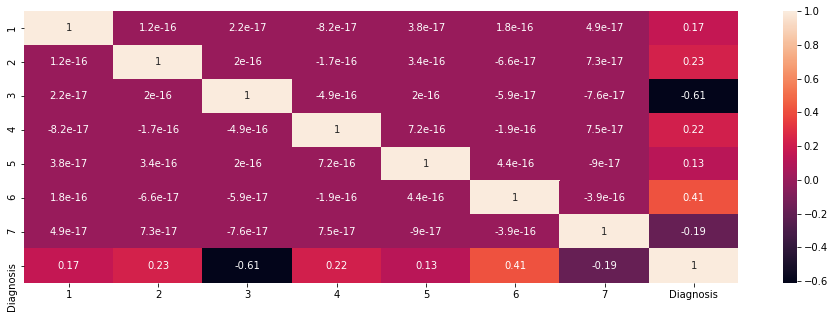

In [0]:
  dataDeletedColumns = dataFilteredCatNoOutlier.copy()
  dataDeletedColumns = convertDeleteColumn(dataDeletedColumns, 'PI')
  dataDeletedColumns = convertDeleteColumn(dataDeletedColumns, 'BMI')
  dataDeletedColumns = convertDeleteColumn(dataDeletedColumns, 'Pregnant')
  dataDeletedColumns = convertDeleteColumn(dataDeletedColumns, 'Fat_Salty')
  dataDeletedColumns = convertDeleteColumn(dataDeletedColumns, 'Sex')

  ids = pd.DataFrame(dataDeletedColumns['ID'])
  y_label = pd.DataFrame(dataDeletedColumns['Diagnosis'])

  x_label = dataDeletedColumns.drop(['ID', 'Diagnosis'], axis=1)
  #We normalize the data, so that PCA gets better results
  x_label = dataDeletedColumns.values
  min_max_scaler = preprocessing.MinMaxScaler()
  x_label_scaled = min_max_scaler.fit_transform(x_label)
  x_label_scaled = pd.DataFrame(x_label_scaled)

  x_label_scaled = pd.DataFrame(transformPCA(x_label_scaled, 7))

  resulting_pca_deleted = pd.DataFrame(np.hstack([ids, x_label_scaled, y_label]))

  resulting_pca_deleted = resulting_pca_deleted.rename(columns={0:'ID', 8:'Diagnosis'})

  plotCorrelationHeatmap(
        resulting_pca_deleted, [1, 2, 3, 4, 5, 6, 7, 'Diagnosis'])


As we can see, it makes a difference of 13% In accuracy if we consider pregnant column (and remove all the NAs)

## Dataframes to be used ahead

In [0]:
  # We end up with the following sets of data:

  # Data without null values on diagnosis, all relevant features converted to categories, no outlier value in BMI
  print(dataFilteredCatNoOutlier)

  # Same as before, but without columns that, according to the correlation study, seem to not influence the diagnosis
  print(dataDeletedColumns)

  # PCA done to all variables (so, PCA to the first dataset)
  print(resulting_pca_all)

  # PCA done to relevant variables (so, PCA to the second dataset)
  print(resulting_pca_deleted)

      ID  Sex  Age   BMI  ...  Gingivorrhagia  Stress_Daily  PI  Diagnosis
0      1    1   56  26.9  ...               0             4   1          0
1      2    1   61  21.2  ...               0             4   1          2
2      3    1    8  14.7  ...               0             3   1          1
3      4    0   22  21.1  ...               0             1   0          1
4      5    1   23  19.1  ...               0             4   0          1
..   ...  ...  ...   ...  ...             ...           ...  ..        ...
211  222    1   78  29.1  ...               1             5   3          2
213  230    0   18  21.9  ...               0             4   0          1
215  232    0   15  25.2  ...               0             2   1          1
216  233    1   12  15.2  ...               0             6   0          1
217  234    1   18  19.2  ...               0            -1   0          1

[174 rows x 17 columns]
      ID  Age  Smoking  ...  Gingivorrhagia  Stress_Daily  Diagnosis
0     

As we can see, the dataset is highly cut down if we clear the rows which have a high impact on the model. Lets try How it goes with SVM
Secondly, if I try removing the pregnant columnn as a whole, it lets us 161 values, so we use dataset_nulls_deleted_removed_pregnant to illustrate that data

In [0]:
# Creating a list for simply importing the 4 dataframes together, anywhere we want.

four_dataframes = [dataFilteredCatNoOutlier,dataDeletedColumns,resulting_pca_all,resulting_pca_deleted]

## Nimish's code

SVM Kernels:
linear, polynomial, rbf, sigmoid

In [0]:
#Nimish's code for SVM using the four datasets mentioned above
#Putting each of them through available kernels of SVM and finding the score of each.
def svm_scores(dataframes_array,kernel_name='linear'):
    from sklearn import svm
    for data in dataframes_array:
        i = data.copy()
        clf = svm.SVC(kernel=kernel_name)
        y = i[['Diagnosis']]
        x = i.drop(['ID','Diagnosis'],axis=1)
        LVOOfolds = KFold(n_splits=x.shape[0]-1)
        tenKfolds = KFold(n_splits=10)
        scores = cross_val_score(clf, x, y_label.to_numpy().ravel(), cv=LVOOfolds)
        scores2 = cross_val_score(clf, x, y.to_numpy().ravel(), cv=tenKfolds)
        print('LVOOCV : ')
        print("Accuracy: %0.2f" % (scores.mean()))
        print('10 folds : ')
        print("Accuracy: %0.2f" % (scores2.mean()))

#Nimish's code for SVM using the four datasets mentioned above
#Putting each of them through available kernels of SVM and finding the score of each.
def deprecated_svm_scores(dataframes_array,kernel_name='linear'):
    from sklearn import svm
    for i in dataframes_array:
        clf = svm.SVC(kernel=kernel_name)
        y = i[['Diagnosis']]
        X = i.drop('Diagnosis',axis=1)
        clf.fit(X,y)
        print(clf.kernel,clf.score(X,y))


In [0]:
svm_scores(four_dataframes)
print("---")
svm_scores(four_dataframes,"rbf")
print("---")
svm_scores(four_dataframes,"poly")
print("---")
svm_scores(four_dataframes,"sigmoid")
print("---")


LVOOCV : 
Accuracy: 0.74
10 folds : 
Accuracy: 0.74
LVOOCV : 
Accuracy: 0.76
10 folds : 
Accuracy: 0.76
LVOOCV : 
Accuracy: 0.98
10 folds : 
Accuracy: 0.98
LVOOCV : 
Accuracy: 0.89
10 folds : 
Accuracy: 0.86
---
LVOOCV : 
Accuracy: 0.78
10 folds : 
Accuracy: 0.79
LVOOCV : 
Accuracy: 0.79
10 folds : 
Accuracy: 0.79
LVOOCV : 
Accuracy: 0.91
10 folds : 
Accuracy: 0.90
LVOOCV : 
Accuracy: 0.86
10 folds : 
Accuracy: 0.84
---
LVOOCV : 
Accuracy: 0.79
10 folds : 
Accuracy: 0.78
LVOOCV : 
Accuracy: 0.79
10 folds : 
Accuracy: 0.79
LVOOCV : 
Accuracy: 0.90
10 folds : 
Accuracy: 0.89
LVOOCV : 
Accuracy: 0.84
10 folds : 
Accuracy: 0.82
---
LVOOCV : 
Accuracy: 0.71
10 folds : 
Accuracy: 0.71
LVOOCV : 
Accuracy: 0.71
10 folds : 
Accuracy: 0.71
LVOOCV : 
Accuracy: 0.98
10 folds : 
Accuracy: 0.98
LVOOCV : 
Accuracy: 0.87
10 folds : 
Accuracy: 0.88
---


As per the above observation, for SVM's linear kernel on Dataframe "PCA done to all variables (so, PCA to the first dataset)" gets us a 98% Accuracy, which is incredible.


## Ilya's Code

We use KNN as a benchmark classifier with the different sub-datasets we have extracted from the original data source. 

In [0]:
def applyKNN(dataFrame, columnsToUse, numberOfNeighbours):

    # load the data
    dataFeatures = pd.DataFrame(dataFrame, columns=columnsToUse)
    dataTarget = pd.DataFrame(dataFrame, columns=['Diagnosis'])

    # splitting
    # X_train, X_test, y_train, y_test = train_test_split(
    #     dataFeatures, dataTarget, test_size=0.20)

    # modelling
    knn = neighbors.KNeighborsClassifier(n_neighbors=numberOfNeighbours)
    # knn.fit(X_train, y_train.to_numpy().ravel())
    # predictions = knn.predict(X_test)

    # scores
    # train_score = knn.score(X_train, y_train)
    # test_score = knn.score(X_test, y_test)
    # print('Train Acc: %.3f' % train_score)
    # print('Test Acc: %.3f' % test_score)

    #CV
    LVOOfolds = KFold(n_splits=dataFeatures.shape[0]-1)
    tenKfolds = KFold(n_splits=10)
    scores = cross_val_score(knn, dataFeatures, dataTarget.to_numpy().ravel(), cv=LVOOfolds)
    scores2 = cross_val_score(knn, dataFeatures, dataTarget.to_numpy().ravel(), cv=tenKfolds)
    print('LVOOCV : ')
    print("Accuracy: %0.2f" % (scores.mean()))
    print('10 folds : ')
    print("Accuracy: %0.2f" % (scores2.mean()))

    #The line / model
    # plt.scatter(y_test, predictions)
    # plt.xlabel("True Values")
    # plt.ylabel("Predictions")
    # plt.show()

In [0]:
# #All the dataset with converted NAN's values into numeric values
# dataFrame = convertWithCategories('data')
# columnsToUse = getAllColumnsButID(dataFrame)
# result = applyKNN(dataFrame, columnsToUse, 6)

# #All rows containing nulls are deleted (58 lines)
# dataFrame = convertDeleteNulls('data')
# columnsToUse = getAllColumnsButID(dataFrame)
# result = applyKNN(dataFrame, columnsToUse, 6)

# #All rows deleted after deleting the pregnant column
# dataFrame = convertDeleteNullsNoPregnant('data')
# columnsToUse = getAllColumnsButID(dataFrame)
# result = applyKNN(dataFrame, columnsToUse, 6)


for i in four_dataframes:
  applyKNN(i, getAllColumnsButID(i), 6)

LVOOCV : 
Accuracy: 0.79
10 folds : 
Accuracy: 0.78
LVOOCV : 
Accuracy: 0.77
10 folds : 
Accuracy: 0.77
LVOOCV : 
Accuracy: 0.97
10 folds : 
Accuracy: 0.97
LVOOCV : 
Accuracy: 0.99
10 folds : 
Accuracy: 0.99
